In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'D:\krish naik - udemy ML and Deep Learning\CampusX\Feature Engineering\weight-height.csv')
df.sample(5)

,Gender,Height,Weight
4963,Male,71.709308,205.648449
3762,Male,71.352201,207.891509
6777,Female,63.892262,148.971114
792,Male,72.132778,184.147189
9103,Female,61.707121,128.757893


In [8]:
df.shape

(10000, 3)

In [12]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

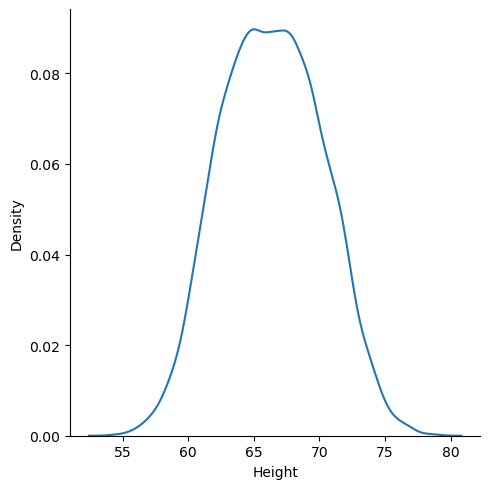

In [16]:
sns.displot(df['Height'],kind= 'kde')

<Axes: ylabel='Height'>

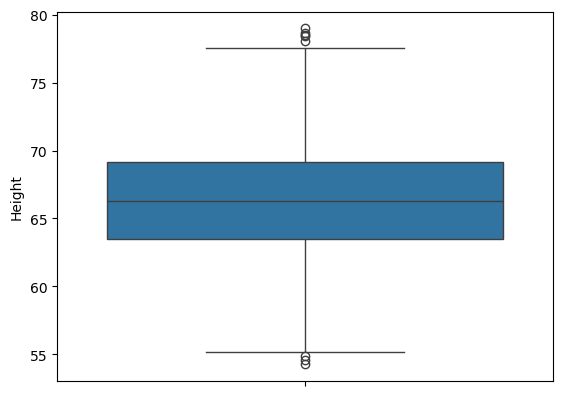

In [18]:
sns.boxplot(df['Height'])

In [22]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [26]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [32]:
outliers = df[(df['Height'] >= 74.78 )| (df['Height'] <= 58.13)]

In [34]:
outliers

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [38]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [42]:
new_df.Height.describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

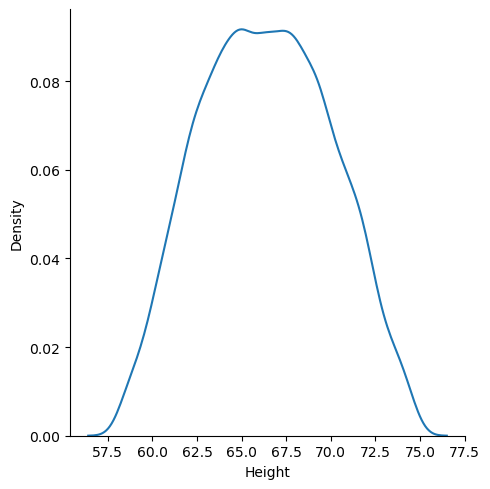

In [44]:
sns.displot(new_df['Height'],kind='kde')

<Axes: xlabel='Height'>

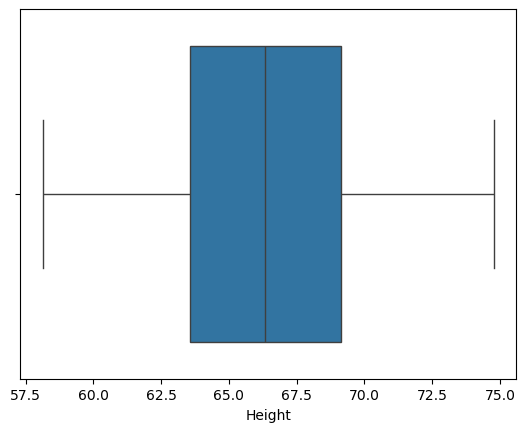

In [48]:
sns.boxplot(new_df['Height'],orient='h')

#### Capping {Winsorization}

In [57]:
df['Height_cap'] = np.where(
    df['Height']>=upper_limit,upper_limit,
    np.where(df['Height'] <= lower_limit,lower_limit,
             df['Height']))

In [61]:
df

,Gender,Height,Weight,Height_cap
0,Male,73.847017,241.893563,73.847017
1,Male,68.781904,162.310473,68.781904
2,Male,74.110105,212.740856,74.110105
3,Male,71.730978,220.042470,71.730978
4,Male,69.881796,206.349801,69.881796
...,...,...,...,...
9995,Female,66.172652,136.777454,66.172652
9996,Female,67.067155,170.867906,67.067155
9997,Female,63.867992,128.475319,63.867992
9998,Female,69.034243,163.852461,69.034243


In [63]:
df['Height_cap'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height_cap, dtype: float64

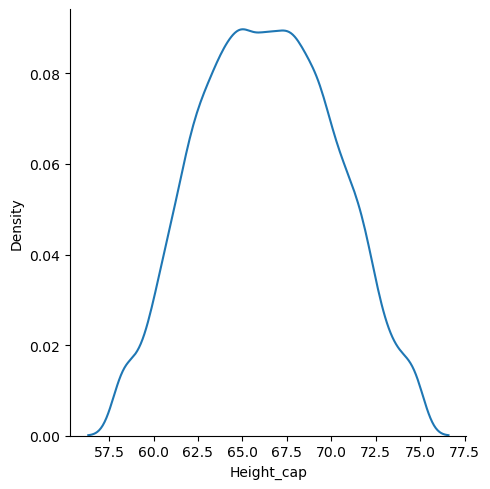

In [65]:
sns.displot(df['Height_cap'],kind = 'kde') # same as before

<Axes: ylabel='Height_cap'>

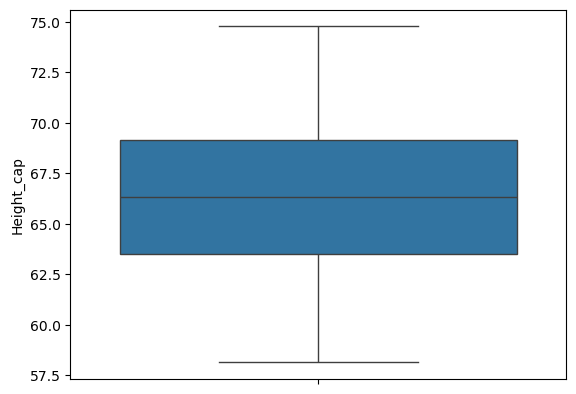

In [67]:
sns.boxplot(df['Height_cap'])